In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import collections
import pandas as pd

# Quick intro

In [2]:
G = nx.Graph([(1, 2), (2, 3), (3, 4)])
print(f'G.edges: {G.edges},\n G.nodes: {G.nodes}, \n G.degree: {G.degree}, \n nx.to_numpy_array(G): {nx.to_numpy_array(G)}')

G.edges: [(1, 2), (2, 3), (3, 4)],
 G.nodes: [1, 2, 3, 4], 
 G.degree: [(1, 1), (2, 2), (3, 2), (4, 1)], 
 nx.to_numpy_array(G): [[0. 1. 0. 0.]
 [1. 0. 1. 0.]
 [0. 1. 0. 1.]
 [0. 0. 1. 0.]]


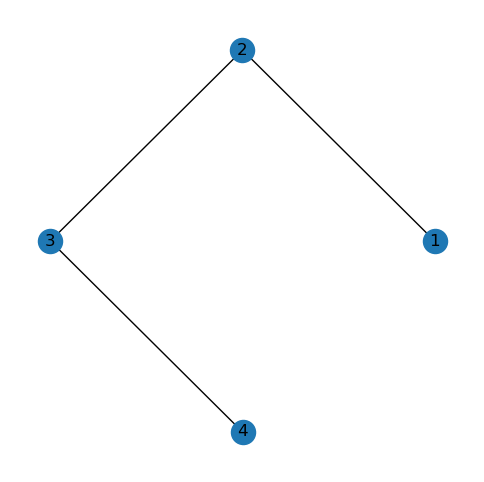

In [3]:
layout = nx.circular_layout(G)
fig, ax = plt.subplots(figsize=(6, 6))
nx.draw_networkx(G, pos=layout)
ax.axis("off")
plt.show()
plt.close()

Defining Random Networks

G(N, p) Model: Each pair of N labeled nodes is connected with probability p, a model introduced by Gilbert.

In the NetworkX, the this basic family of random graphs is implemented as *fast_gnp_random_graph*.

Below example how to access graphs' degree.

In [4]:
G = nx.fast_gnp_random_graph(10, 0.3, seed=123)
degree_sequence = sorted([d for n, d in G.degree()], reverse=False)
degree_counter = collections.Counter(degree_sequence)
deg, cnt = zip(*degree_counter.items())
deg, cnt

((1, 2, 3, 4, 5, 6), (1, 1, 1, 2, 4, 1))

# Exercise 1: Random graphs

Investigate how does an average node degree changes with increasing: <br>
    a) number of nodes; <br>
    b) increasing probability of linkeage.

In [5]:
# solution

# Facebook network example
[Download_link](http://snap.stanford.edu/data/ego-Facebook.html)

In [7]:
facebook = pd.read_csv(
    "facebook_combined.txt.gz",
    compression="gzip",
    sep=" ",
    names=["start_node", "end_node"],
)
facebook

,start_node,end_node
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5
...,...,...
88229,4026,4030
88230,4027,4031
88231,4027,4032
88232,4027,4038


In [8]:
full_facebook_graph = nx.from_pandas_edgelist(facebook, "start_node", "end_node")
G = full_facebook_graph

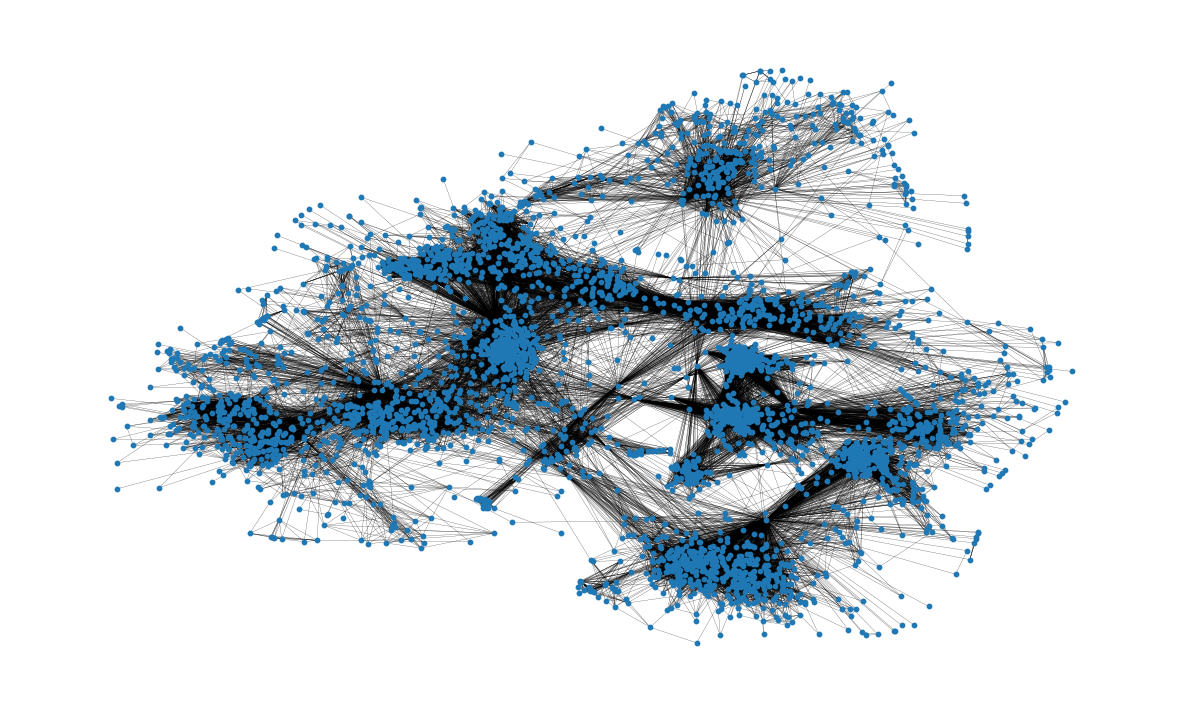

In [9]:
pos = nx.spring_layout(G, iterations=17, seed=123)
plot_options = {"node_size": 10, "with_labels": False, "width": 0.15}

fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
nx.draw_networkx(G, pos=pos, ax=ax, **plot_options)
plt.show()
plt.close()

# Exercise 2

There is a famous idea called **six handshakes rule** [wiki](https://en.wikipedia.org/wiki/Six_degrees_of_separation).

*Six degrees of separation is the idea that all people are six or fewer social connections away from each other. As a result, a chain of "friend of a friend" statements can be made to connect any two people in a maximum of six steps. It is also known as the six handshakes rule.*

Compute the average distance between pairs of nodes in the graph using [NetworkX shortest path functions](https://networkx.org/documentation/stable/reference/algorithms/shortest_paths.html).

In [10]:
# solution

# Exercise 3

Compare (sample of) facebook network with aforementioned random network: <br>
    - calculate *p* so that the random graph has a similar number of edges;<br>
    - compute and compare maximum path length (*diameter*) and average path length for both networks.

In [11]:
# Solution

# Communities

In [12]:
import itertools
import matplotlib.colors as mcolors

In [12]:
plot_options = {"node_size": 40, "with_labels": False, "width": 0.15}

In [13]:
def draw(G, colour_map=None, iter_step=-1, func=nx.shell_layout, **kwargs):
    if "bipartite_side" in kwargs:
        layout = nx.bipartite_layout(G, kwargs["bipartite_side"])
    else:
        layout = func(G)
    fig, ax = plt.subplots(figsize=(6, 6))
    if colour_map is not None:
        nx.draw_networkx(G, node_color=colour_map, pos=layout, **plot_options)
        nx.draw_networkx_edges(G, pos=layout, edgelist=most_valuable_edges, width=2, edge_color='red')
    else:
        nx.draw_networkx(G, pos=layout, **plot_options)
    if "node_labels" in kwargs:
        if kwargs["node_labels"]:
            nx.draw_networkx_labels(G, pos=layout, verticalalignment='bottom', horizontalalignment='right')
    ax.axis("off")
    if iter_step is not None:
        plt.title(f'Step: {iter_step+1}')
    plt.show()
    plt.close()

#### [Girvan-Newman method](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.centrality.girvan_newman.html)

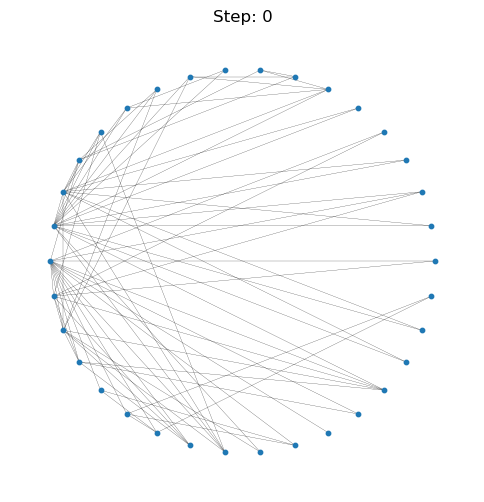

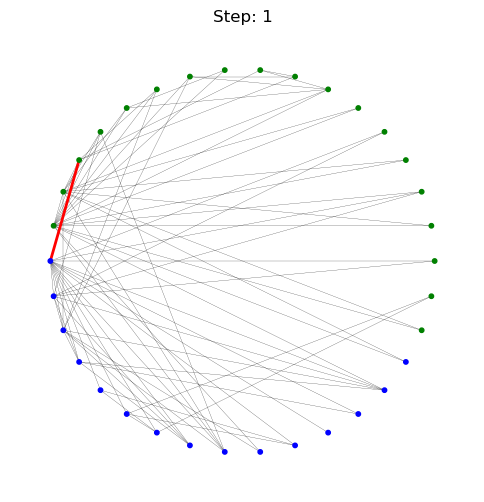

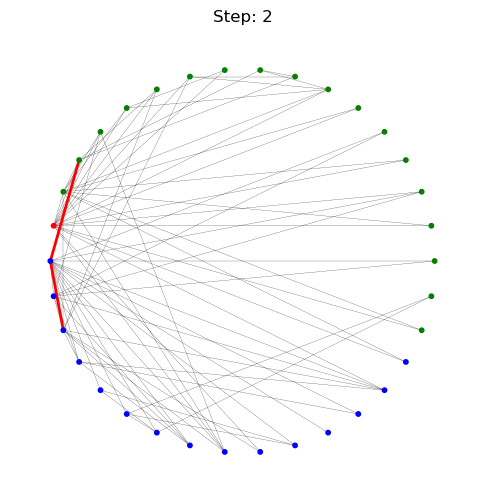

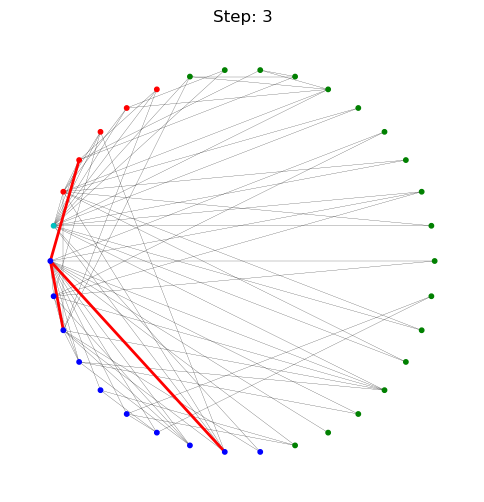

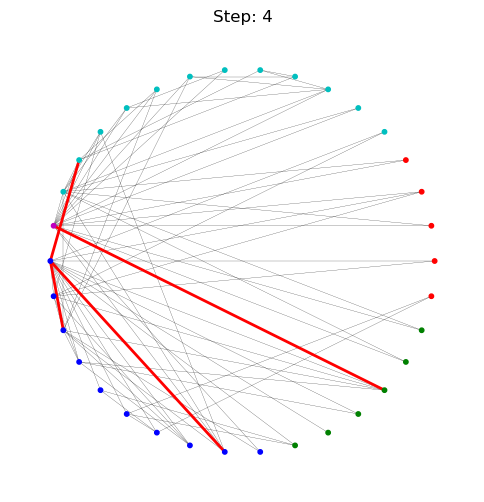

In [14]:
G = nx.karate_club_graph()
draw(G)


k = 4
communities_generator = nx.community.girvan_newman(G)
G_new = G.copy()
most_valuable_edges = []

for iter_step, communities in enumerate(itertools.islice(communities_generator, k)):
    
    betweenness = nx.edge_betweenness_centrality(G_new)
    most_valuable_edge = max(betweenness, key=betweenness.get)
    G_new.remove_edge(*most_valuable_edge)
    most_valuable_edges.append(most_valuable_edge)
    
    colour_map = []
    for num, community in enumerate(communities):
        for element in community:
            colour_map.append(list(mcolors.BASE_COLORS.keys())[num])
            
    draw(G, colour_map, iter_step)

# Exercise 4

Using Girvan-Newman method, create loop where you measure the diameter and an average distance within communites in **facebook subgraph** network for partictions of increasing number of tuples of communities (up to 10-th step).

In [15]:
G = full_facebook_graph.subgraph(range(100))
nx.is_connected(G)

True

In [16]:
# solution

# Exercise 5

For unweighted graphs, the clustering of a node is the fraction of possible triangles through that node that exist. In other words *probability that my two neighbours know each other*.  [NetworkX documentation + formulas](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.cluster.clustering.html#networkx.algorithms.cluster.clustering) <br>
- compute clustering coefficient for the facebook network; <br>
- construct random graphs with 100 nodes and increasing *p*. How does the clustering coefficient change?

In [17]:
# solution

# * Bipartite networks and higher order clustering

Standard clustering coefficient is based on existence of triangles. However it is not always feasible or simply not desired. Consider bipartite graph:

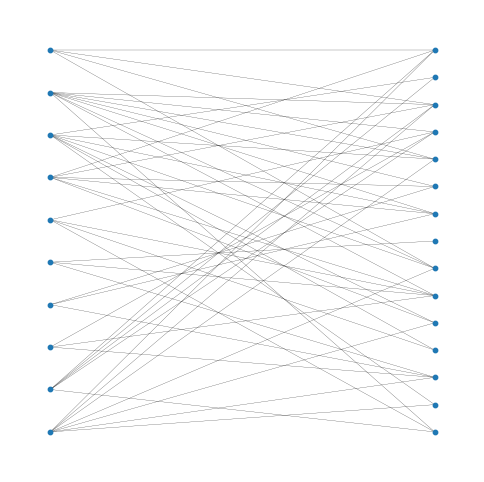

In [18]:
G = nx.algorithms.bipartite.generators.gnmk_random_graph(10, 15, 50, seed=123)
top = nx.bipartite.sets(G)[0]
draw(G, None, None, None, bipartite_side=top)

In [19]:
all([v==0 for k, v in nx.clustering(G).items()])

True

By the definition, in the bipartite network two *neighbours* of a given node are not connected. However, we can consider higher order clustering, starting with **square clustering coefficient**.

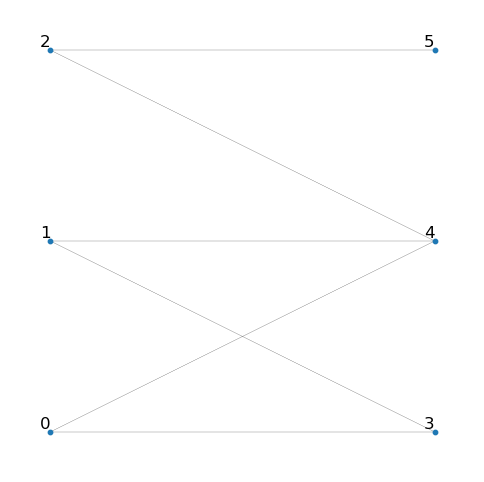

In [20]:
G = nx.algorithms.bipartite.generators.gnmk_random_graph(3, 3, 6, seed=123)
left = nx.bipartite.sets(G)[0]
draw(G, None, None, None, bipartite_side=left, node_labels=True)

Square clustering coefficient, in simple words, denotes *probability that two of my neighbours share a common neighbour other than me*.

In [21]:
nx.square_clustering(G)

{0: 0.5, 1: 0.5, 2: 0.0, 3: 1.0, 4: 0.2, 5: 0}

On the example of **node 0**, we can see that the only pair of neighbours for the node is 3 and 4. 3 and 4 each have two neighbours out of which one is common. 

# * Exercise 6

Generate a bipartite network with 10 and 10 nodes on either side. Vary number of edges. Tasks: <br>
a) why for low number of edges we cannot distinguish two sides of the graph (nx.bipartite.sets)? <br>
b) with increasing number of edges, replicate 10 times at each level and answer how many times we could unambiguously define sides in the bipartite graph at each of the levels? <br>
c) compute average over replications at the given level, average clustering coefficient.

In [22]:
# solution

# * Centrality

While there are many measures of node centrality, one that we consider here is based on shortest paths. It denotes fraction of shortest paths in the graph, which cross given node.

Betweenness centrality of a node $v$ is the sum of the
    fraction of all-pairs shortest paths that pass through $v$, <br>
       $c_B(v) =\sum_{s,t \in V} \frac{\sigma(s, t|v)}{\sigma(s, t)}$, <br>
    where $V$ is the set of nodes, $ s \neq t$, $\sigma(s, t)$ is the number of
    shortest $(s, t)$-paths,  and $\sigma(s, t|v)$ is the number of
    those paths  passing through some  node $v$ other than $s, t$.
    If $s = t$, $\sigma(s, t) = 1$, and if $v \in {s, t}$,
   $\sigma(s, t|v) = 0$.

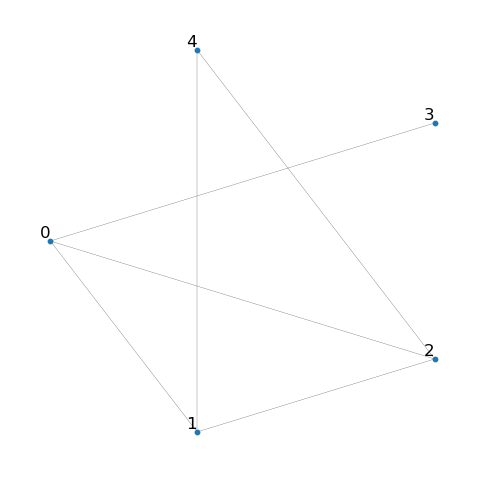

In [23]:
G = nx.fast_gnp_random_graph(5, 0.5, seed=123)
draw(G, iter_step=None, node_labels=True)

In [24]:
dict(nx.all_pairs_shortest_path(G))

{0: {0: [0], 1: [0, 1], 2: [0, 2], 3: [0, 3], 4: [0, 1, 4]},
 1: {1: [1], 0: [1, 0], 2: [1, 2], 4: [1, 4], 3: [1, 0, 3]},
 2: {2: [2], 0: [2, 0], 1: [2, 1], 4: [2, 4], 3: [2, 0, 3]},
 3: {3: [3], 0: [3, 0], 1: [3, 0, 1], 2: [3, 0, 2], 4: [3, 0, 1, 4]},
 4: {4: [4], 1: [4, 1], 2: [4, 2], 0: [4, 1, 0], 3: [4, 1, 0, 3]}}

In [25]:
shortest_through_0 = 0
n_shortest_paths = 0
for k1, v1 in dict(nx.all_pairs_shortest_path(G)).items():
    for k2, v2 in v1.items():
        if k2 == k1:
            continue
        if 0 in v2 and k1 != 0:
            shortest_through_0 += 1
        n_shortest_paths += 1
        
print(shortest_through_0/ n_shortest_paths)

0.5


# * Exercise 7

Compute shortest path centrality for the facebook subgraph (you don't have to limit yourself aforementioned functions only). Find nodes with the highest and lowest values. Compute their degree.

In [26]:
G = full_facebook_graph.subgraph(range(200))
# solution